- https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

## 데이터 클렌징 Data Cleasing
데이터는 분석이나 학습에 사용하기에 적합한 형태로 존재하지 않을 수 있다

클렌징: 분석에 적합하지 않은 형태로 존재하는 데이터를 분석에 적합하게 변환하거나 정리하는 과정
1. 데이터 누락(NA) 파악 및 처리
2. 이상치(Outliers) 파악 및 처리
3. 불필요한 데이터 파악 및 제거
4. 데이터를 일관성 있게 수정

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure

df = pd.read_csv('data/sberbank.csv')

print(df.shape)
print(df.dtypes)

(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


In [2]:
# 수치형 컬럼 선택
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

In [3]:
# 수치형이 아닌 컬럼 선택
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']


### 데이터 누락 (NA) 파악 및 처리
- 데이터에 누락된 값(NA)이 포함됐을 때 에러 발생
- NA 값이 포함된 행을 제외하거나 NA 값을 다른 값으로 변환해야함
- NA 값을 포함한 행 찾기: isnull()

### 1. NA 값 존재 여부 찾기

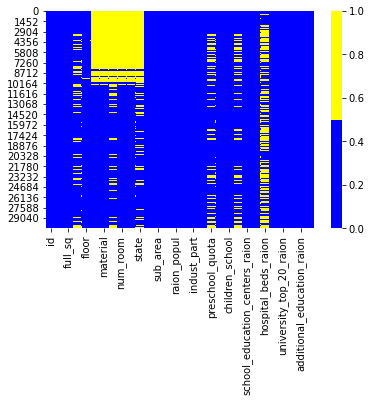

In [4]:
# 방법 1.누락 데이터 Heatmap 활용

cols = df.columns[:30] 
colours = ['blue', 'yellow'] # 노랑 - 누락. 파랑 - 정상.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

# Heatmap 결과
# floor, material, num_room, kitch_sq, state는 앞쪽 행의 값이 모두 누락됨

In [5]:
# 방법 2. 누락 데이터 비율 리스트
# column에 포함된 누락 데이터의 비율 계산

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
# 비율 리스트 결과
# life_sq는 21%가 누락되었으며, floor는 1%만 누락됨

id - 0.0%
timestamp - 0.0%
full_sq - 0.0%
life_sq - 21.0%
floor - 1.0%
max_floor - 31.0%
material - 31.0%
build_year - 45.0%
num_room - 31.0%
kitch_sq - 31.0%
state - 44.0%
product_type - 0.0%
sub_area - 0.0%
area_m - 0.0%
raion_popul - 0.0%
green_zone_part - 0.0%
indust_part - 0.0%
children_preschool - 0.0%
preschool_quota - 22.0%
preschool_education_centers_raion - 0.0%
children_school - 0.0%
school_quota - 22.0%
school_education_centers_raion - 0.0%
school_education_centers_top_20_raion - 0.0%
hospital_beds_raion - 47.0%
healthcare_centers_raion - 0.0%
university_top_20_raion - 0.0%
sport_objects_raion - 0.0%
additional_education_raion - 0.0%
culture_objects_top_25 - 0.0%
culture_objects_top_25_raion - 0.0%
shopping_centers_raion - 0.0%
office_raion - 0.0%
thermal_power_plant_raion - 0.0%
incineration_raion - 0.0%
oil_chemistry_raion - 0.0%
radiation_raion - 0.0%
railroad_terminal_raion - 0.0%
big_market_raion - 0.0%
nuclear_reactor_raion - 0.0%
detention_facility_raion - 0.0%
full_

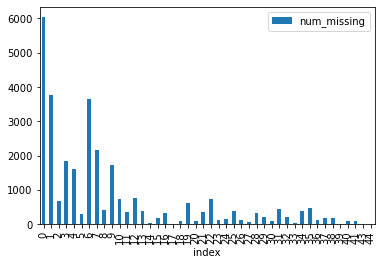

In [6]:
# 방법 3. 누락 데이터 히스토그램

for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        #print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

# 컬럼이름에 ismissing이 들어간 변수들의 히스토그램 생성 
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

# 히스토그램 결과
# 30,471행 중에 누락된 값이 없는 경우(0)가 6,000개 정도이며
# 1개의 누락된 값을 갖는 경우는 대략 4,000개 정도

### 2. 누락 데이터 처리 

- 누락 데이터를 포함한 행 제거

In [7]:
# 한 행에서 누락데이터가 35개 이상인 행 제거
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

- 누락 데이터가 많은 컬럼 제거

In [8]:
# hospital_beds_raion 컬럼은 많은 누락 데이터가 포함됨

cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

- 누락된 데이터를 다른 값으로 대체

In [9]:
# fillna() 로 누락 데이터 대체
med = df['life_sq'].median()
print(med)
df['life_sq'] = df['life_sq'].fillna(med)

30.0


In [10]:
# 수치형 변수에서 누락된 경우 중앙값으로 대체

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: floor
imputing missing values for: max_floor
imputing missing values for: material
imputing missing values for: build_year
imputing missing values for: num_room
imputing missing values for: kitch_sq
imputing missing values for: state
imputing missing values for: preschool_quota
imputing missing values for: school_quota
imputing missing values for: hospital_beds_raion
imputing missing values for: raion_build_count_with_material_info
imputing missing values for: build_count_block
imputing missing values for: build_count_wood
imputing missing values for: build_count_frame
imputing missing values for: build_count_brick
imputing missing values for: build_count_monolith
imputing missing values for: build_count_panel
imputing missing values for: build_count_foam
imputing missing values for: build_count_slag
imputing missing values for: build_count_mix
imputing missing values for: raion_build_count_with_builddate_info
imputing missing values for: build_count_before

In [11]:
# 범주형 변수의 경우 가장 빈번하게 나타나는 범주로 누락값 대체

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] 
        df[col] = df[col].fillna(top)

In [12]:
# NA로 입력되어 있으면 다루기가 번거롭기에 특정 수치나 범주로 대체
# 예를 들어 수치 -999, 범주 _MISSING_ 으로 대체

# categorical
df['sub_area'] = df['sub_area'].fillna('_MISSING_')


# numeric
df['life_sq'] = df['life_sq'].fillna(-999)

### 3. 이상치(Outliers) 다루기 
- 이상치: 한 변수의 값이 가지는 패턴에서 벗어난 아주 크거나 작은 값
- 이상치는 평균의 왜곡을 불러옴

- 히스토그램 / 박스 플롯으로 찾기 

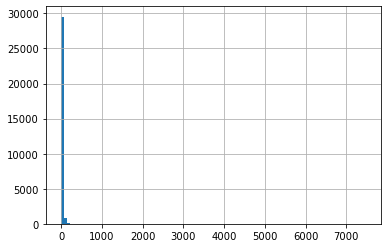

In [13]:
df['life_sq'].hist(bins=100)

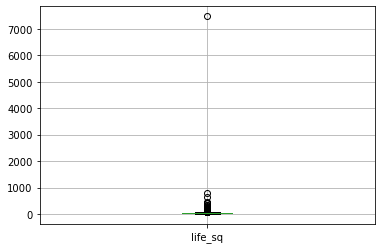

In [14]:
df.boxplot(column=['life_sq'])

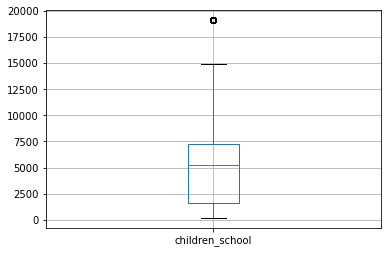

In [15]:
df.boxplot(column=['children_school'])

- 기술 통계치에서 발견 하기

In [16]:
# 값 7478 은 이상치
df['life_sq'].describe()

count    30471.000000
mean        33.480883
std         46.522251
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

### 4. 불필요한 데이터 제거 
- 반복되는 값이 많은 변수

In [17]:
# 변수 값 중 95%이상이 동일한 경우, 의미있는 변수로 보기 어려움

num_rows = len(df.index)
low_information_cols = [] 

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

oil_chemistry_raion: 99.02858%
no     30175
yes      296
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 96.27187%
no     29335
yes     1136
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.16780%
no     29608
yes      863
Name: nuclear_reactor_raion, dtype: int64

build_count_foam: 95.35624%
0.0     29056
1.0       969
11.0      262
2.0       184
Name: build_count_foam, dtype: int64

big_road1_1line: 97.43691%
no     29690
yes      781
Name: big_road1_1line, dtype: int64

railroad_1line: 97.06934%
no     29578
yes      893
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.25641%
0    29635
1      787
2       38
3       11
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.51101%
0    30322
1      149
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.52689%
0    29108
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: cafe_count_1000_price_high, dtype: int64

mosq

- 중복 데이터 제거

In [18]:
# 10 행의 데이터가 중복
# 'id' 컬럼을 제외하고 (id는 행 마다 다르므로)
# drop_duplicates()로 중복되는 행 제거

df_dedupped = df.drop('id', axis=1).drop_duplicates()

print(df.shape)
print(df_dedupped.shape)

(30471, 344)
(30461, 343)


### 데이터를 일관성 있게 수정

- 대소문자 사용 통일: 모두 소문자로 변경

In [19]:
# “Poselenie Sosenskoe” and “pOseleNie sosenskoe”가 동일
df['sub_area'].value_counts(dropna=False)

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Kievskij                   2
Poselenie Shhapovskoe                2
Poselenie Mihajlovo-Jarcevskoe       1
Poselenie Klenovskoe                 1
Name: sub_area, Length: 146, dtype: int64

In [20]:
# 범주를 모두 소문자로 변경
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie kievskij                   2
poselenie shhapovskoe                2
poselenie mihajlovo-jarcevskoe       1
poselenie klenovskoe                 1
Name: sub_area_lower, Length: 146, dtype: int64

- 형식 변환
- 변수 형식을 의미에 맞게 변환, timestamp는 날짜형식인데 문자로 인식하고 있음

In [21]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

2014    13662
2013     7978
2012     4839
2015     3239
2011      753
Name: year, dtype: int64

12    3400
4     3191
3     2972
11    2970
10    2736
6     2570
5     2496
9     2346
2     2275
7     1875
8     1831
1     1809
Name: month, dtype: int64


## 데이터 불균형
- 분류 문제의 목표 변수가 갖는 범주 값이 한 범주에 지나치게 치우친 경우를 뜻하며, 불균형으로 이로 제대로된 학습이 이루어지기 어려움
- 데이터 불균형으로 인해 성과지표 왜곡되어 나타날 수 있음
- https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

Class 0: 3594
Class 1: 644
Proportion: 5.58 : 1


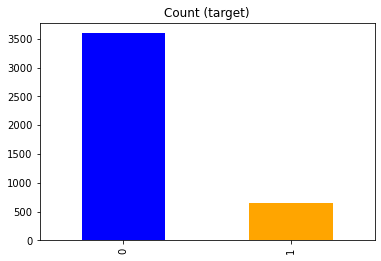

In [22]:
import numpy as np
import pandas as pd

heart = pd.read_csv('data/framingham_heart_disease.csv')

target_count = heart.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)', color=['blue','orange'])

- 목표변수인 TenYearCHD의 값이 5.58:1(양성:악성)으로 분포

### 성과지표 왜곡

In [23]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = heart.drop('TenYearCHD', axis=1)
y = heart['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 86.32%


In [25]:
model = XGBClassifier()
model.fit(X_train[['cigsPerDay']], y_train)
y_pred = model.predict(X_test[['cigsPerDay']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 86.67%


### 혼동 행렬로 확인

In [26]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[735   0]
 [113   0]]


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print("Precision: {:.2%}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2%}".format(recall_score(y_test, y_pred)))
print("F1: {:.2%}".format(f1_score(y_test, y_pred)))
print("ROC AUC: {:.2%}".format(roc_auc_score(y_test, y_pred)))

Precision: 0.00%
Recall: 0.00%
F1: 0.00%
ROC AUC: 50.00%


C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 언더 샘플링, 오버 샘플링
- 가능한 목표 변수의 두 범주의 데이터 숫자를 일치시킬 필요가 있음
- 언더 샘플링: 상대적으로 데이터가 많은 범주에서 무작위로 데이터를 제외하여 두 범주 데이터 수의 균형을 맞춤
- 오버 샘플링: 상대적으로 데이터가 적은 범주의 데이터를 무작위로 중복 추가하여 두 범주 데이터 수의 균형을 맞춤

- 언더 샘플링
- 데이터를 제거하기 때문에 정보 손실이 발생

In [28]:
# Class count
count_class_0, count_class_1 = heart.TenYearCHD.value_counts()
print("count_class_0:", count_class_0)
print("count_class_1:", count_class_1)

# Divide by class
df_class_0 = heart[heart.TenYearCHD == 0]
df_class_1 = heart[heart.TenYearCHD == 1]

count_class_0: 3594
count_class_1: 644


Random under-sampling:
1    644
0    644
Name: TenYearCHD, dtype: int64


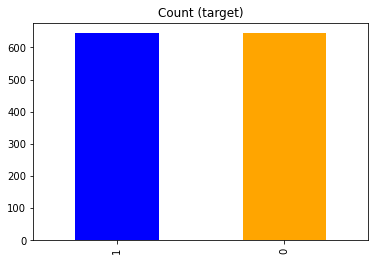

In [29]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under.TenYearCHD.value_counts())

df_under.TenYearCHD.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

- 오버 샘플링
- 데이터를 중복해서 사용하기 때문에 과적합 발생이 쉬움

Random over-sampling:
1    3594
0    3594
Name: TenYearCHD, dtype: int64


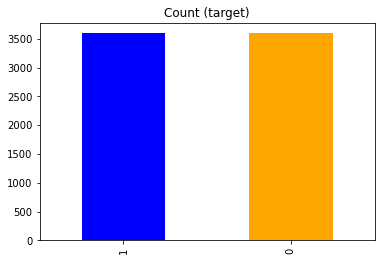

In [30]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.TenYearCHD.value_counts())

df_over.TenYearCHD.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

- df_under, df_over 활용

In [31]:
X = df_under.drop('TenYearCHD', axis=1)
y = df_under['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 67.05%


In [32]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[88 40]
 [45 85]]


In [33]:
X = df_over.drop('TenYearCHD', axis=1)
y = df_over['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 72.46%


In [34]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[497 249]
 [147 545]]


### 파이썬 imbalanced-learn 라이브러리 활용

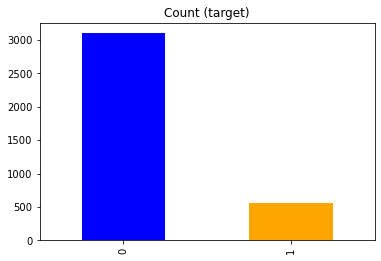

In [35]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt

heart = pd.read_csv('data/framingham_heart_disease.csv')
heart = heart.dropna()
X = heart.drop('TenYearCHD', axis=1)
y = heart['TenYearCHD']

y.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

- 언더, 오버 샘플링 데이터 보여주기

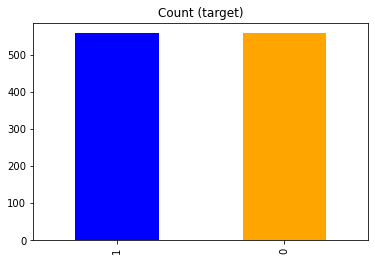

In [36]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)

y_rus.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

2542 new random picked points


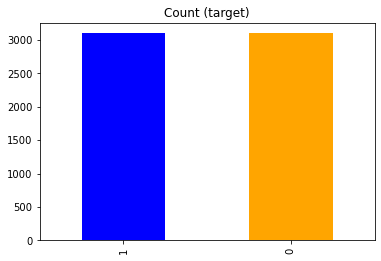

In [37]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

y_ros.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

- 언더, 오버 샘플링 데이터 활용하기

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

heart = pd.read_csv('data/framingham_heart_disease.csv')
heart = heart.dropna()
X = heart.drop('TenYearCHD', axis=1)
y = heart['TenYearCHD']

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with under sampling: {:.2%}".format(accuracy))

Accuracy with under sampling: 72.20%


In [40]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[80 30]
 [32 81]]


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with over sampling: {:.2%}".format(accuracy))

Accuracy with over sampling: 72.90%


In [42]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[424 172]
 [164 480]]


- 언더 샘플링: Tomek links
- 분류하고자 하는 두 범주 데이터가 매우 근접하게 쌍으로 존재하는 경우
- Tomek links에서 더 많이 분포하는 범주의 데이터 제거

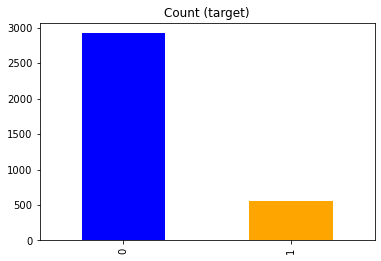

In [43]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_sample(X, y)

y_tl.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

- 언더 샘플링: 군집화 중앙값 (Kmeans 군집화)
- 다수의 데이터가 포함된 범주의 데이터를 Kmeans 군집화를 이용해 N개의 클러스터 형성
- N개의 클러스터의 중앙값이 샘플링된 새로운 데이터

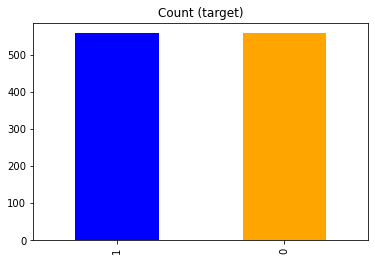

In [44]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_sample(X, y)

y_cc.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

- 오버 샘플링: SMOTE
- 적은 수의 범주 데이터를 이용해서 합성 데이터를 생성, 적은 수의 범주 데이터 중에서 무작위로 선택하고 최근접 이웃 데이터를 고려하여 새로운 데이터를 합성하여 생성

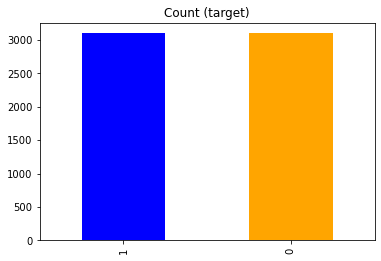

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

- ADASYN(Adaptive Synthetic Sampling)
- 합성 데이터를 생성하는 방안, 적은 데이터분포에 반비례하여 합성데이터 생성
- 적은 범주의 데이터가 적게 분포하는 곳에 더 많은 합성 데이터가 생기며, 적은 범주의 데이터가 많이 분포하는 곳에 합성 데이터가 적게 생김

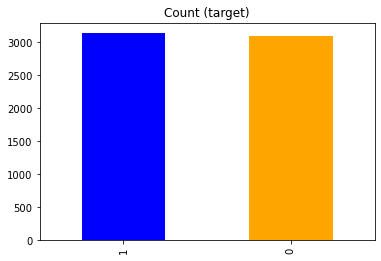

In [46]:
from imblearn.over_sampling import ADASYN

ada = ADASYN()
X_ada, y_ada = ada.fit_sample(X, y)

y_ada.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

- 언더 샘플링 수행 후 오버 샘플링
- Tomek links -> SMOTE
- Tomek links를 통해 두 범주가 구분되는 간격 더 넓게 확보 -> 적게 분포하는 데이터를 SMOTE로 오버샘플링

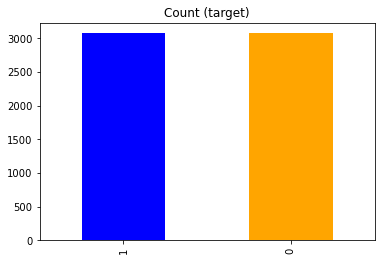

In [47]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt, y_smt = smt.fit_sample(X, y)

y_smt.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

### 성과 측정

In [48]:
# Tomek links
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("ROC AUC with Tomek links: {:.2%}".format(roc_auc_score(y_test, y_pred)))

ROC AUC with Tomek links: 54.18%


In [49]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[585   8]
 [ 93  10]]


In [50]:
# Kmeans median
X_train, X_test, y_train, y_test = train_test_split(X_cc, y_cc, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("ROC AUC with under sampling by clustering centroids: {:.2%}".format(roc_auc_score(y_test, y_pred)))

ROC AUC with under sampling by clustering centroids: 88.27%


In [51]:
# SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("ROC AUC with over sampling by SMOTE: {:.2%}".format(roc_auc_score(y_test, y_pred)))

ROC AUC with over sampling by SMOTE: 86.39%


In [52]:
# ADASYN
X_train, X_test, y_train, y_test = train_test_split(X_ada, y_ada, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("ROC AUC with over sampling by ADASYN: {:.2%}".format(roc_auc_score(y_test, y_pred)))

ROC AUC with over sampling by ADASYN: 85.23%


In [53]:
# SMOTETomek (Tomek links -> SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("ROC AUC with SMOTE after Tomek links: {:.2%}".format(roc_auc_score(y_test, y_pred)))

ROC AUC with SMOTE after Tomek links: 84.48%


### 연습문제

In [54]:
import numpy as np
import pandas as pd

card = pd.read_csv('data/creditcard.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- Time은 0번행 거래 이후의 시간 차이
- Amount 거래금액
- Class 1: 부정 거래, 0: 정상 거래(목표변수)
- V1 ~ V28 개인 정보 문제로 인해 실제 변수가 아니고 차원 축소를 통해 변형된 값임

Class 0: 284315
Class 1: 492
Proportion: 577.88 : 1


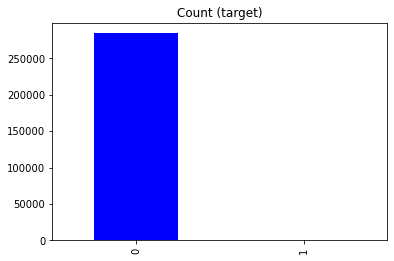

In [55]:
target_count = card.Class.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)', color=['blue','orange'])

- 정상 거래 데이터가 부정 거래 데이터의 577배 많이 존재함
- 극심하게 데이터 불균형이 나타나고 있으며, 부정 거래 데이터가 492개로 매우 적음
- 데이터 불균형을 해소 랜덤 포레스트를 적용하여 분류 모형 학습 후 성과 측정

In [56]:
X = card.drop('Class', axis=1)
y = card['Class']

### 언더 샘플링

- 랜덤 언더 샘플링

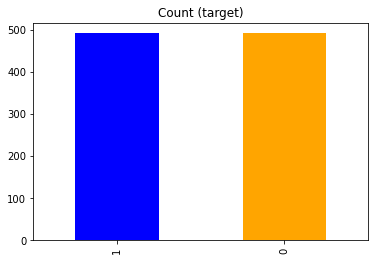

In [57]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)
y_rus.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

- 언더 샘플링: Tomek Links

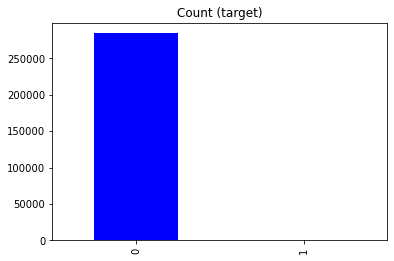

In [58]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_sample(X, y)

y_tl.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

- 언더 샘플링: 군집화 중앙값

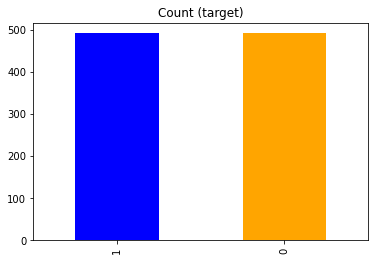

In [59]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_sample(X, y)

y_cc.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

### 오버 샘플링

- 랜덤 오버 샘플링

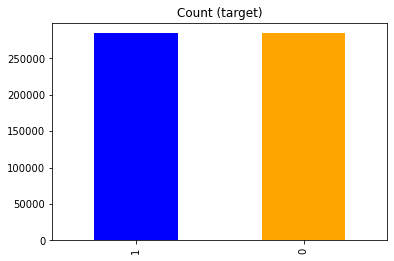

In [60]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)
y_ros.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

- 오버 샘플링: SMOTE

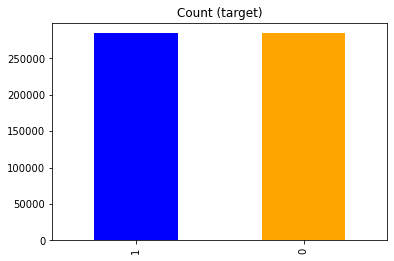

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

- 오버 샘플링: ADASYN

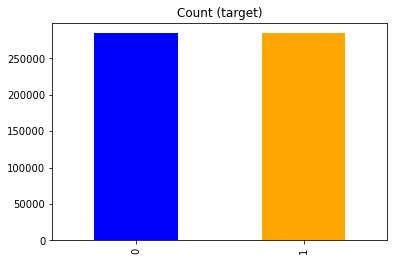

In [62]:
from imblearn.over_sampling import ADASYN

ada = ADASYN()
X_ada, y_ada = ada.fit_sample(X, y)

y_ada.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

- 언더 샘플링 후 오버 샘플링

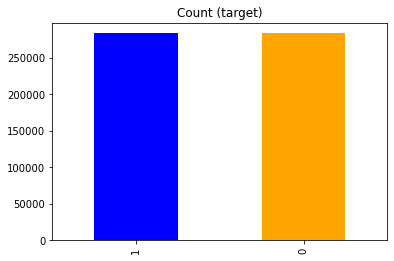

In [63]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt, y_smt = smt.fit_sample(X, y)

y_smt.value_counts().plot(kind='bar', title='Count (target)', color=['blue','orange'])

### 성과 측정

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 

rnd_clf = RandomForestClassifier(
    n_estimators = 500,  
    max_features = 'auto', 
    max_samples=0.5,    
    bootstrap = True,
    n_jobs=-1
)

In [65]:
scores = cross_val_score(rnd_clf, X_rus, y_rus, scoring='roc_auc', cv=5)
print('ROC AUC with random under sampling: {:.3}'.format(scores.mean()))

ROC AUC with random under sampling: 0.974


In [66]:
scores = cross_val_score(rnd_clf, X_tl, y_tl, scoring='roc_auc', cv=5)
print('ROC AUC with random under sampling - Tomek links: {:.3}'.format(scores.mean()))

ROC AUC with random under sampling - Tomek links: 0.914


In [67]:
scores = cross_val_score(rnd_clf, X_cc, y_cc, scoring='roc_auc', cv=5)
print('ROC AUC with random under sampling - Cluster Centroids: {:.3}'.format(scores.mean()))

ROC AUC with random under sampling - Cluster Centroids: 1.0


In [68]:
scores = cross_val_score(rnd_clf, X_ros, y_ros, scoring='roc_auc', cv=5)
print('ROC AUC with random over sampling : {:.3}'.format(scores.mean()))

ROC AUC with random over sampling : 1.0


In [69]:
scores = cross_val_score(rnd_clf, X_sm, y_sm, scoring='roc_auc', cv=5)
print('ROC AUC with random over sampling - SMOTE: {:.3}'.format(scores.mean()))

ROC AUC with random over sampling - SMOTE: 1.0


In [70]:
scores = cross_val_score(rnd_clf, X_ada, y_ada, scoring='roc_auc', cv=5)
print('ROC AUC with random over sampling - ADASYN: {:.3}'.format(scores.mean()))

ROC AUC with random over sampling - ADASYN: 0.989


In [ ]:
scores = cross_val_score(rnd_clf, X_smt, y_smt, scoring='roc_auc', cv=5)
print('ROC AUC with under sampling and over sampling: {:.3}'.format(scores.mean()))

### scikit learn 리샘플링

In [7]:
import numpy as np
import pandas as pd

card = pd.read_csv('data/creditcard.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
from sklearn.utils import resample

df_majority = card[card.Class==0]
df_minority = card[card.Class==1]

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                ) 

In [9]:
df_majority_downsampled.shape

(492, 31)

In [10]:
df_minority.shape

(492, 31)

In [11]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1000,     # to match minority class
                                ) 

In [12]:
df_majority_downsampled.shape

(1000, 31)

In [13]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 ) 

In [14]:
df_minority_upsampled.shape

(1000, 31)

In [15]:
card_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled], ignore_index=True)

In [16]:
card_sampled.shape

(2000, 31)

In [17]:
card_sampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,817.0,1.138436,-0.363658,1.172233,0.834377,-1.097949,0.114876,-0.852064,0.336240,1.257870,...,-0.089810,-0.134284,0.088154,0.062793,0.108077,0.353508,0.019256,0.019079,8.04,0
1,18517.0,-1.328664,0.049628,-0.566406,-0.379436,2.361369,3.304372,-0.339407,1.135012,0.586463,...,-0.139359,-0.244752,0.664976,0.965953,-0.252314,0.399951,-0.039728,-0.014460,78.70,0
2,59608.0,-2.372855,-1.328858,0.773397,-1.465745,0.126641,-0.924435,0.574956,-0.199231,-1.260837,...,-0.504530,-0.308794,0.613267,0.025110,0.111316,0.859140,-0.272052,-0.368434,132.98,0
3,154129.0,1.975278,-0.241487,-1.531427,0.171060,0.172252,-0.889817,0.269407,-0.361624,0.293429,...,0.247487,0.686614,0.012958,0.829860,0.081666,0.744669,-0.102704,-0.051095,69.00,0
4,46602.0,0.552155,-1.399284,-0.109265,0.504668,-0.706982,0.417907,0.013132,0.116120,-1.329923,...,-0.170036,-0.792478,-0.174133,-0.355645,0.127598,-0.473549,-0.002359,0.069537,352.51,0


In [18]:
card_sampled.Class.value_counts()

1    1000
0    1000
Name: Class, dtype: int64